In [1]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Loading in the data
df = pd.read_csv('reslog.csv')
df

,batch_size,fsc_nomask,fsc_sphericalmask,fsc_loosemask,fsc_tightmask,fsc_noisesub
0,1000,3.613450,3.397822,3.353027,3.176371,3.172318
1,1500,3.527686,3.311609,3.234184,3.087301,3.087129
2,2250,3.420741,3.207343,3.184941,3.040318,3.039041
3,3375,3.359389,3.164706,3.126173,3.041995,3.044875
4,5062,3.215116,3.105036,3.079950,3.030110,3.028857
5,7593,3.207822,3.097767,3.031409,2.946330,2.946980
6,11389,3.139944,3.052802,2.964900,2.907030,2.903185
7,17083,3.107264,3.022396,2.933715,2.857384,2.854736
8,25624,3.046798,2.936369,2.909592,2.857901,2.860223
9,38436,3.034671,2.907397,2.870198,2.824530,2.826296


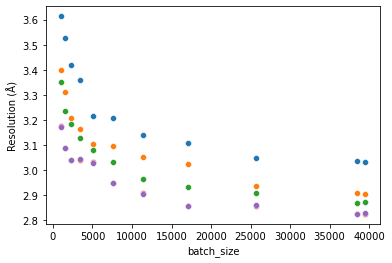

In [3]:
# Plotting the data with x=batch
sns.scatterplot(data=df, x='batch_size', y='fsc_nomask')
sns.scatterplot(data=df, x='batch_size', y='fsc_sphericalmask')
sns.scatterplot(data=df, x='batch_size', y='fsc_loosemask')
sns.scatterplot(data=df, x='batch_size', y='fsc_tightmask')
sns.scatterplot(data=df, x='batch_size', y='fsc_noisesub')
plt.ylabel('Resolution (Å)')
plt.show()

In [4]:
# Log10 of batch to straighted graph
df['batch_size_log'] = df['batch_size'].apply(lambda x: np.log10(x))
df.head()

,batch_size,fsc_nomask,fsc_sphericalmask,fsc_loosemask,fsc_tightmask,fsc_noisesub,batch_size_log
0,1000,3.613450,3.397822,3.353027,3.176371,3.172318,3.000000
1,1500,3.527686,3.311609,3.234184,3.087301,3.087129,3.176091
2,2250,3.420741,3.207343,3.184941,3.040318,3.039041,3.352183
3,3375,3.359389,3.164706,3.126173,3.041995,3.044875,3.528274
4,5062,3.215116,3.105036,3.079950,3.030110,3.028857,3.704322


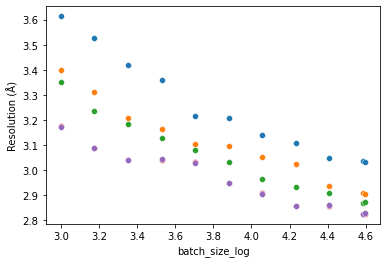

In [5]:
# Plotting the data with x=log batch 
sns.scatterplot(data=df, x='batch_size_log', y='fsc_nomask')
sns.scatterplot(data=df, x='batch_size_log', y='fsc_sphericalmask')
sns.scatterplot(data=df, x='batch_size_log', y='fsc_loosemask')
sns.scatterplot(data=df, x='batch_size_log', y='fsc_tightmask')
sns.scatterplot(data=df, x='batch_size_log', y='fsc_noisesub')
plt.ylabel('Resolution (Å)')
plt.show()

In [6]:
# making new column names for inverting the resolution
col_names = ['fsc_nomask', 'fsc_sphericalmask', 'fsc_loosemask',
       'fsc_tightmask', 'fsc_noisesub']
print(col_names)
new_names = [f'{name}_inverse' for name in col_names]
print(new_names)

['fsc_nomask', 'fsc_sphericalmask', 'fsc_loosemask', 'fsc_tightmask', 'fsc_noisesub']
['fsc_nomask_inverse', 'fsc_sphericalmask_inverse', 'fsc_loosemask_inverse', 'fsc_tightmask_inverse', 'fsc_noisesub_inverse']


In [8]:
# actual inversion of each resolution parameter
df['fsc_nomask_inverse'] = df['fsc_nomask'].apply(lambda x: 1/x)
df['fsc_sphericalmask_inverse'] = df['fsc_sphericalmask'].apply(lambda x: 1/x)
df['fsc_loosemask_inverse'] = df['fsc_loosemask'].apply(lambda x: 1/x)
df['fsc_tightmask_inverse'] = df['fsc_tightmask'].apply(lambda x: 1/x)
df['fsc_noisesub_inverse'] = df['fsc_noisesub'].apply(lambda x: 1/x)
df.head()

,batch_size,fsc_nomask,fsc_sphericalmask,fsc_loosemask,fsc_tightmask,fsc_noisesub,batch_size_log,fsc_nomask_inverse,fsc_sphericalmask_inverse,fsc_loosemask_inverse,fsc_tightmask_inverse,fsc_noisesub_inverse
0,1000,3.613450,3.397822,3.353027,3.176371,3.172318,3.000000,0.276744,0.294306,0.298238,0.314825,0.315227
1,1500,3.527686,3.311609,3.234184,3.087301,3.087129,3.176091,0.283472,0.301968,0.309197,0.323908,0.323926
2,2250,3.420741,3.207343,3.184941,3.040318,3.039041,3.352183,0.292334,0.311785,0.313978,0.328913,0.329051
3,3375,3.359389,3.164706,3.126173,3.041995,3.044875,3.528274,0.297673,0.315985,0.319880,0.328732,0.328421
4,5062,3.215116,3.105036,3.079950,3.030110,3.028857,3.704322,0.311031,0.322057,0.324681,0.330021,0.330158


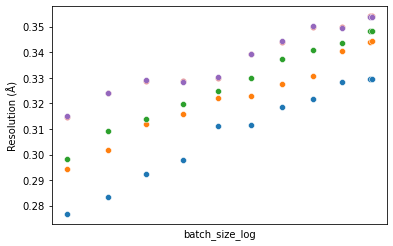

In [11]:
# plotting each of the new transformations
for name in new_names:
    sns.scatterplot(data=df, x='batch_size_log', y=name)
    plt.xscale('symlog')
plt.ylabel('Resolution (Å)')
plt.show()


In [14]:
# importing the module for linear regression
from sklearn.linear_model import LinearRegression

In [18]:
# Converting the data frame values to numpy arrays
X = np.array(df['batch_size_log'])
# reshaping is only required for a series (single vector)
X = X.reshape(-1,1)
# it is not necessary to convert y to a numpy array
y = df['fsc_noisesub_inverse']


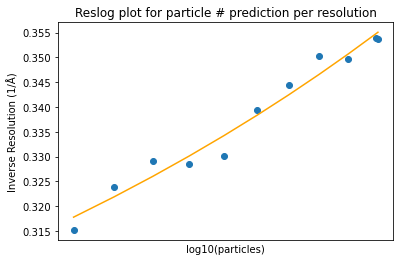

In [20]:
# instantiating the LR model and running it.
model = LinearRegression()
model.fit(X,y)
y_predict_rgr = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_predict_rgr, color='orange')
plt.xscale('symlog')
plt.title('Reslog plot for particle # prediction per resolution')
plt.xlabel('log10(particles)')
plt.ylabel('Inverse Resolution (1/Å)')
plt.show()

In [21]:
# using the coefficient and intercepts to predict resolution or particle numbers
coef = model.coef_
intercept = model.intercept_
resolution_required = 1/2.5
particles = (resolution_required - intercept) / coef
print(np.round(10**particles[0],0))

3322831.0


ValueError: x and y must be the same size

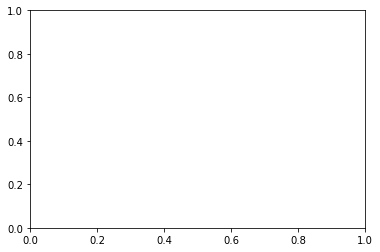

In [38]:
# using all points
X = df[new_names]
# X = X.reshape(-1,1)

model_big = LinearRegression()
model.fit(X,y)
y_predict_rgr = model.predict(X)
plt.scatter(X, y)
plt.plot(X, y_predict_rgr, color='orange')
plt.xscale('symlog')
plt.title('Reslog plot for particle # prediction per resolution')
plt.xlabel('log10(particles)')
plt.ylabel('Inverse Resolution (1/Å)')
plt.show()

In [28]:
X

,fsc_nomask_inverse,fsc_sphericalmask_inverse,fsc_loosemask_inverse,fsc_tightmask_inverse,fsc_noisesub_inverse
0,0.276744,0.294306,0.298238,0.314825,0.315227
1,0.283472,0.301968,0.309197,0.323908,0.323926
2,0.292334,0.311785,0.313978,0.328913,0.329051
3,0.297673,0.315985,0.319880,0.328732,0.328421
4,0.311031,0.322057,0.324681,0.330021,0.330158
5,0.311738,0.322813,0.329880,0.339405,0.339330
6,0.318477,0.327568,0.337280,0.343994,0.344449
7,0.321827,0.330863,0.340865,0.349970,0.350295
8,0.328213,0.340557,0.343691,0.349907,0.349623
9,0.329525,0.343950,0.348408,0.354041,0.353820


In [48]:
from sklearn.model_selection import train_test_split
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
y_train.size

8

In [50]:
X_train.size

40

In [51]:
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)
y_prediction =  LR.predict(X_test)


In [53]:
print(X_test.size, y_prediction.size)

15 3


ValueError: x and y must be the same size

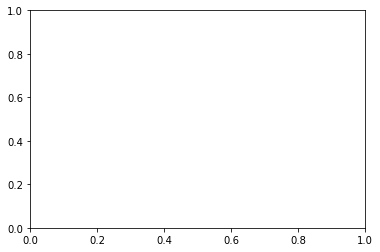

In [52]:
plt.scatter(X_test, y_prediction)